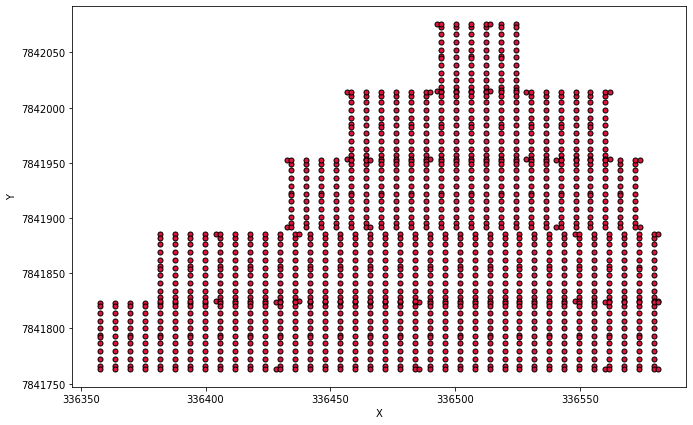

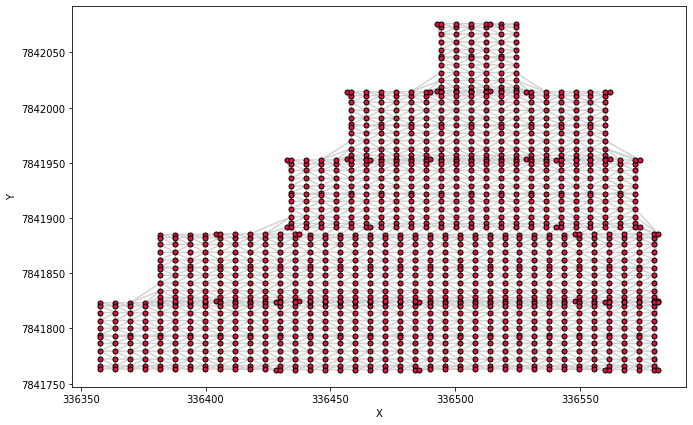

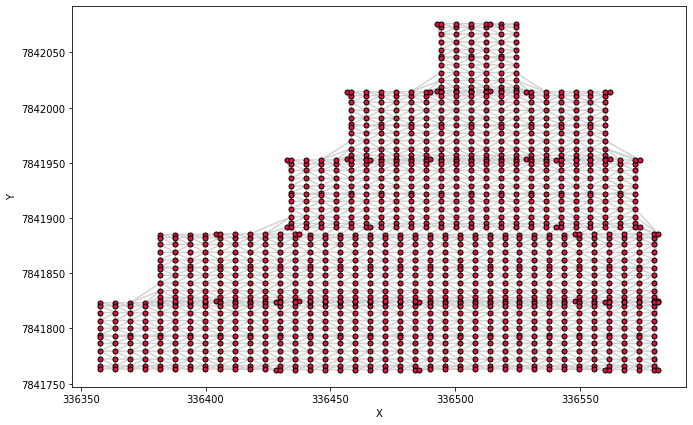

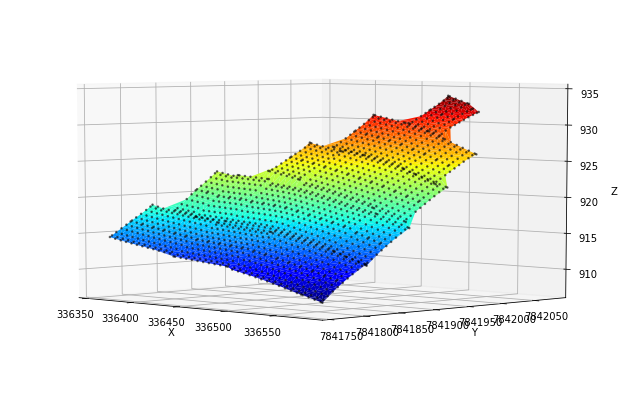

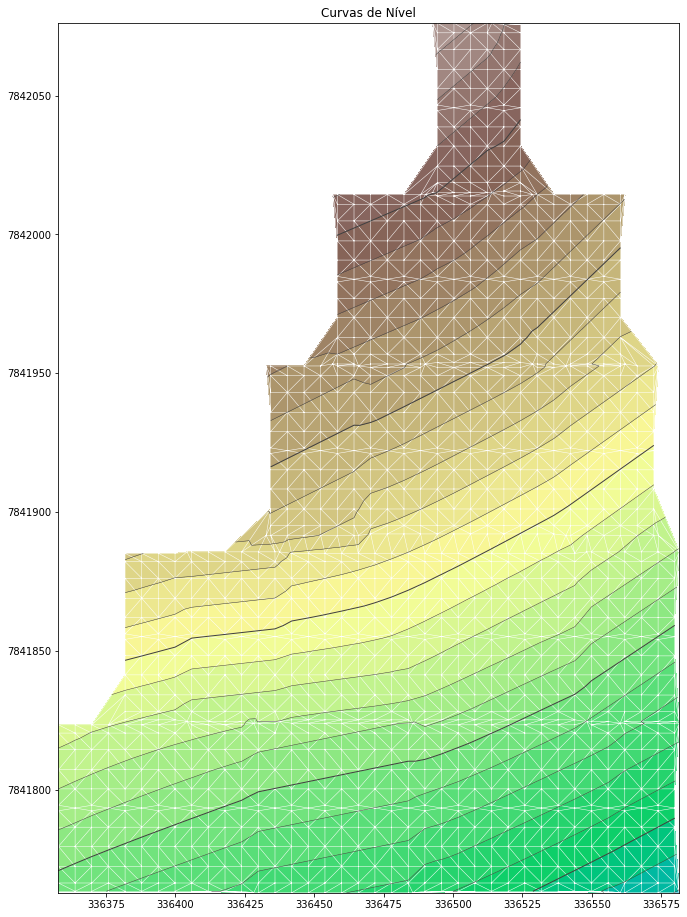

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('nuvempts.txt', header = None)
x=data[0]
y=data[1]
z=data[2]

plt.rcParams['figure.figsize'] = (11,7)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x, y, marker=".", c="#DC143C", edgecolors="black", s=100)
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

plt.rcParams['figure.figsize'] = (11,7)


def long_edges(x, y, triangles, radio=25):
    out = []
    for points in triangles:
        #print points
        a,b,c = points
        d0 = np.sqrt( (x[a] - x[b]) **2 + (y[a] - y[b])**2 )
        d1 = np.sqrt( (x[b] - x[c]) **2 + (y[b] - y[c])**2 )
        d2 = np.sqrt( (x[c] - x[a]) **2 + (y[c] - y[a])**2 )
        max_edge = max([d0, d1, d2])
        #print points, max_edge
        if max_edge > radio:
            out.append(True)
        else:
            out.append(False)
    return out

triang = mtri.Triangulation(x, y)
mask = long_edges(x,y, triang.triangles)
triang.set_mask(mask)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.triplot(triang, c="#D3D3D3", marker='.', markerfacecolor="#DC143C", markeredgecolor="black", markersize=10)


ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

#-----------------------------------------------------------------------------
# Preciso de uma forma de filtrar os tringulos que tem áreas maiores 'degeneram o MDT'
#-----------------------------------------------------------------------------


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.triplot(triang, c="#D3D3D3", marker='.', markerfacecolor="#DC143C", markeredgecolor="black", markersize=10)


ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

plt.rcParams['figure.figsize'] = (11,7)

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_trisurf(triang, z, cmap='jet')
ax.scatter(x,y,z, marker='.', s=10, c="black", alpha=0.5)
ax.view_init(elev=5, azim=-45)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


#-----------------------------------------------------------------------------
# Gerando as curvas de nível
#-----------------------------------------------------------------------------
plt.rcParams['figure.figsize'] = (16,16)
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.triplot(triang, lw=0.5, color='white')
levels = np.arange(900, 940.1)
cmap = cm.get_cmap(name='terrain', lut=None)
ax.tricontourf(triang,z,levels=levels, cmap=cmap)


ax.tricontour(triang, z,levels=levels,
               colors=['0.25', '0.25', '0.25', '0.25', '0.25'],
               linewidths=[1.0, 0.5, 0.5, 0.5, 0.5])

ax.set_title("Curvas de Nível")

plt.show()